In [5]:
!pip install tensorflow_datasets

     |████████████████████████████████| 3.9 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 48 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 198 kB 3.7 MB/s eta 0:00:01
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21494 sha256=90a2cb80a37908a03f18f125c8f5b91f9938c1f2cd095e9145069a3e118393fa
  Stored in directory: /home/rouzan/.cache/pip/wheels/54/aa/01/724885182f93150035a2a91bce34a12877e8067a97baaf5dc8
Successfully built promise


In [1]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
import tensorflow as tf

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print (tf.__version__)

2.2.0


In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [4]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

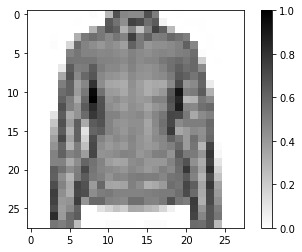

In [5]:
for image, label in test_dataset.take(2):
      break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

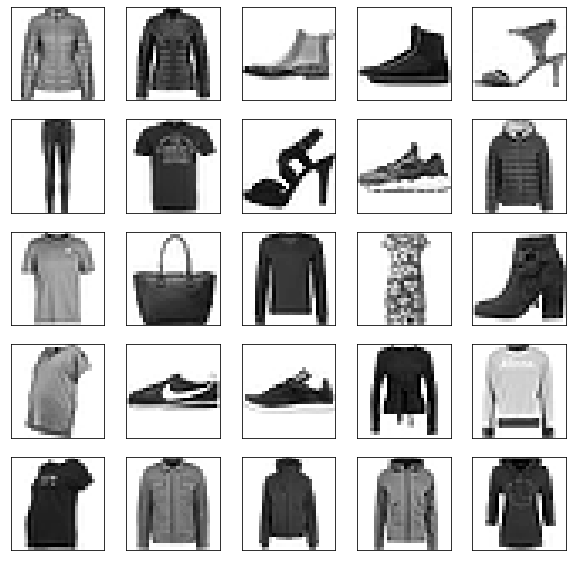

In [6]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    i += 1
plt.show()



In [7]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(60000).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [8]:
print (train_dataset)

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(70, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 70)                9030      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                710       
Total params: 110,220
Trainable params: 110,220
Non-trainable params: 0
_________________________________________________________________


In [12]:
with open('modelsummary.txt', 'w') as f:

    model.summary(print_fn=lambda x: f.write(x + '\n'))

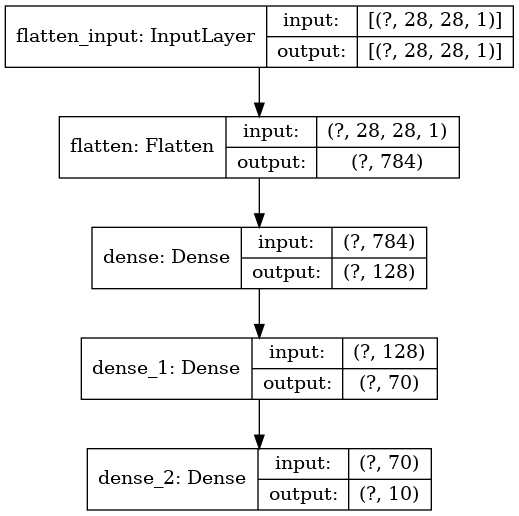

In [13]:
tf.keras.utils.plot_model(
        model,
        to_file='model.png',
        show_layer_names=True,
        show_shapes=True
    )

In [14]:
hist = model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(60000/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5192 - accuracy: 0.8209
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3647 - accuracy: 0.8682
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3304 - accuracy: 0.8791
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3019 - accuracy: 0.8884
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2918 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2731 - accuracy: 0.8982
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2599 - accuracy: 0.9025
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2477 - accuracy: 0.9072
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2389 - accuracy: 0.9107
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - 

In [15]:
est_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(10000/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 3s 10ms/step - loss: 0.3178 - accuracy: 0.8861
Accuracy on test dataset: 0.8860999941825867


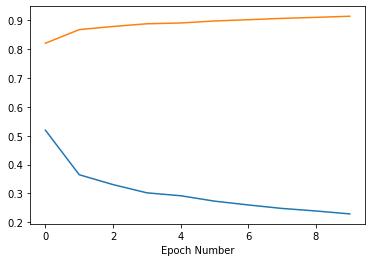

In [16]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.plot(hist.history['loss']);
plt.plot(hist.history['accuracy']);

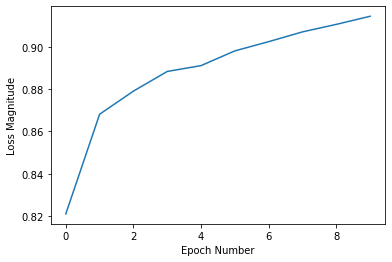

In [17]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(hist.history['accuracy']);

In [18]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [19]:
tflite_model_file = "mnist_model.tflite"
open(tflite_model_file, 'wb').write(tflite_model)

442664